## Описание модели ##

Модель полезного сигнала имеет вид:

$$ y(x) = \theta_0 + \theta_1 x + . . . + \theta_m x^m $$

Рассматривается модель наблюдений

$$ y_k = \theta_0 + \theta_1 x + . . . + \theta_m x^m + \varepsilon_k, \quad k = \overline{1,n}$$

где $ \varepsilon_1,.....\varepsilon_k $ – независимые и одинаково распределённые случайные величины.

### Моделирование данных

Смоделировать два набора наблюдений на основе модели наблюдений для следующих случаев:

$$ a) \,\, m = 3, \varepsilon_k \sim N(\theta, \sigma^2);  \quad б) \,\, m = 2, \varepsilon_k \sim R(-3\sigma, 3\sigma) $$
$$ x_k = −4 + k \frac{8}{n}, \quad k = \overline{1,n}, n = 40. $$

Сначала создадим данные и выполним задания для случая а), затем для случая б) 

### Моделируем данные а)

[ 86.87586896  76.30282725  70.8122188   65.92911258  55.58143807
  51.83105289  52.44699474  41.12066567  37.79027192  37.33424007
  31.78518206  27.17850801  27.26543196  21.76786636  21.0712122
  25.3484957   22.95622007  20.69874524  25.13798631  22.86204178
  21.82614022  26.47456385  25.93508907  29.89900086  32.95007881
  34.31292414  37.39582346  42.34810089  43.05807311  48.31757364
  54.13574711  59.54474185  66.48568192  69.77125694  72.6394169
  80.58486548  87.50578195  96.05373794 102.45353096 108.1808353 ]


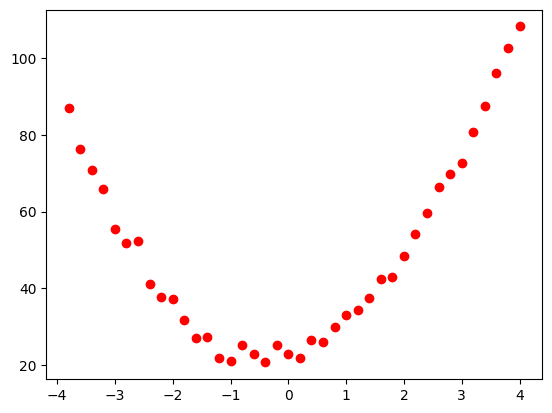

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math

n = 40
theta_0 = 22
theta_1 = 4
theta_2 = 5
theta_3 = -0.12
sigma_squared = 2.9

#error_normal = st.norm.rvs(loc=0, scale=sigma_squared**(0.5), size=n)

error_normal = np.zeros(n)
error_normal = np.array([1.2912289629750553
,-1.6958927459211235
,-0.10426119654033016
,1.5969525833287508
,-2.6585619310078026
,-0.8031871145998478
,4.937874742326383
,-1.738214326823379
,-0.8874880823527797
,2.374240068926814
,0.08534205727114987
,-1.713011992678546
,0.7361519608829654
,-2.839493636235582
,-2.048787802535728
,3.2870557016760045
,1.5303000651454053
,-0.5089347566036779
,3.7370263119036604
,0.8620417763833398
,-1.1728997754313095
,2.0822438497981515
,-0.2389909251873352
,1.5604408580878104
,2.0700788108642167
,0.5202841381509412
,0.32510345721886663
,1.6396208913615369
,-1.6420868876540635
,-0.7224263582982774
,0.41350710580249705
,0.8036218469339141
,2.394801919895504
,0.005496940294336975
,-3.120583097457793
,-1.4829745204758713
,-1.177738054590725
,0.45245794141059015
,-0.36182904227356516
,-2.13916470474244])

x = np.linspace(-4 + 0.2, 4, n)

Y_true = theta_0 + theta_1*x + theta_2*x**2 + theta_3*x**3

Y = Y_true + error_normal
print(Y)

plt.scatter(x, Y, c='r')

plt.show()

Нормальная ошибка сгенерированная питоном выглядит следующим образом:

[ 1.29122896 -1.69589275 -0.1042612   1.59695258 -2.65856193 -0.80318711
  4.93787474 -1.73821433 -0.88748808  2.37424007  0.08534206 -1.71301199
  0.73615196 -2.83949364 -2.0487878   3.2870557   1.53030007 -0.50893476
  3.73702631  0.86204178 -1.17289978  2.08224385 -0.23899093  1.56044086
  2.07007881  0.52028414  0.32510346  1.63962089 -1.64208689 -0.72242636
  0.41350711  0.80362185  2.39480192  0.00549694 -3.1205831  -1.48297452
 -1.17773805  0.45245794 -0.36182904 -2.1391647 ]


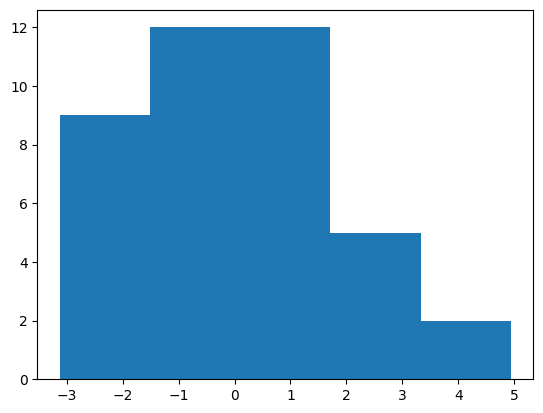

In [90]:
print(error_normal)

with open('file.txt', 'w') as f:
    for i in range(n):
        print(error_normal[i], file=f)

plt.hist(error_normal, 5)
plt.show()

## №1(a) 
**Подобрать порядок многочлена $ m $ в модели полезного сигнала, используя критерий Фишера, и вычислить оценки неизвестных параметров $ (\theta_0,.....\theta_m) $ методом наименьших квадратов.**

Критерий Фишера: $ \quad H_0: \theta_k = 0, \quad H_1: \theta_k \neq 0$

$$ T(Z_n) = \frac{\hat{\theta_k}}{\sqrt{\alpha_k} ||\hat{E}|| } \sqrt{n - m - 1} , $$
где $ \alpha_k $ - k-й элемент на главной диагонали матрицы $ (X^T X)^{-1}, \,\, \hat{\theta_k} $ - k-ый элемент МНК оценки $\theta, \,\, E = Y - X\hat{\theta} $ - вектор остатков

Далее, 

$$ Law(T(Z_n) | H_0) \sim t(n - m - 1), \quad G_{0\alpha} = (-t_{1-\frac{\alpha}{2}}(n - m - 1), \,\,\,t_{1-\frac{\alpha}{2}}(n - m - 1) ),  \quad G_{1\alpha} = \Re \backslash G_{0\alpha} $$

Будем последовательно брать натуральные m по возрастанию и для каждого проверять гипотезу $H_0$: $\,$ если $T(Z_n = (y_1,...,y_n), m) \in G_{0\alpha}$, то m-й член полинома нулевой, значит многочлен имеет порядок m - 1. Если же $T(Z_n = (y_1,...,y_n), m) \in G_{1\alpha}$, то берем следующий m.

Пусть  m = 1

T_1 =  2.30330735131143
t_1 =  2.024394164575136 

|T_1| > |t_1|, значит theta_1 не равна 0


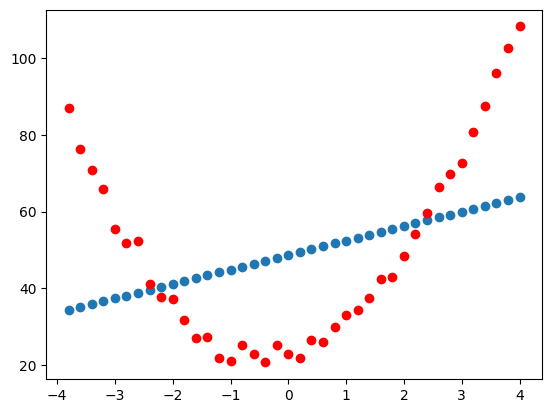

In [91]:
m = k = 1

X = np.vstack((np.ones(n), x)).T
theta_mnk = np.linalg.inv(X.T @ X) @ X.T @ Y

theta_mnk_1 = theta_mnk[k]
alpha_1 = np.linalg.inv(X.T @ X)[k][k]
E_norm = np.dot(Y - X @ theta_mnk, Y - X @ theta_mnk)**(0.5)
T_1 = (theta_mnk_1 * (n - m - 1)**(0.5)) / ((alpha_1)**(0.5) * E_norm)

alpha = 0.05
q = 1 - alpha / 2
df = n - m - 1
t_1 = st.t.ppf(q, df, loc=0, scale=1)

print("T_1 = ", T_1)
print("t_1 = ", t_1, "\n")
if(abs(T_1) > abs(t_1)): 
    print("|T_1| > |t_1|, значит theta_1 не равна 0")
else: 
    print("|T_1| <= |t_1|, значит theta_1 равна 0")
    
plt.scatter(x, theta_mnk[0] + theta_mnk[1] * x)
plt.scatter(x, Y, c='r')
plt.show()

То есть порядок многочлена >= 1, пусть m = 2

T_2 =  62.78811147223281
t_2 =  2.0261924630291093 

|T_2| > |t_2|, значит theta_2 не равна 0


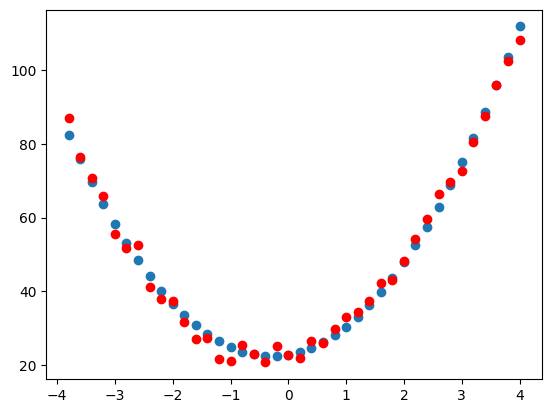

In [92]:
m = k = 2

X = np.vstack((np.ones(n), x, x**2)).T
theta_mnk = np.linalg.inv(X.T @ X) @ X.T @ Y

theta_mnk_2 = theta_mnk[k]
alpha_2 = np.linalg.inv(X.T @ X)[k][k]
E_norm = np.dot(Y - X @ theta_mnk, Y - X @ theta_mnk)**(0.5)
T_2 = (theta_mnk_2 * (n - m - 1)**(0.5)) / ((alpha_2)**(0.5) * E_norm)

df = n - m - 1
t_2 = st.t.ppf(q, df, loc=0, scale=1)

print("T_2 = ", T_2)
print("t_2 = ", t_2, "\n")
if(abs(T_2) > abs(t_2)):
    print("|T_2| > |t_2|, значит theta_2 не равна 0")
else: 
    print("|T_2| <= |t_2|, значит theta_2 равна 0")
    
plt.scatter(x, theta_mnk[0] + theta_mnk[1] * x + theta_mnk[2] * x**2)
plt.scatter(x, Y, c='r')
plt.show()

То есть порядок многочлена >= 2, проверим m = 3

T_3 =  -4.815029831728726
t_3 =  2.0280940009804502 

|T_3| > |t_3|, значит theta_3 не равна 0


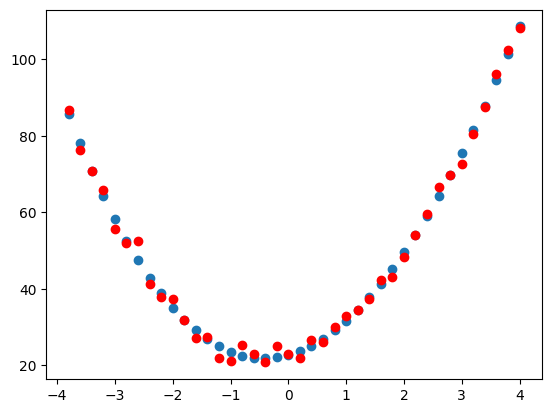

In [93]:
m = k = 3

X = np.vstack((np.ones(n), x, x**2, x**3)).T
theta_mnk = np.linalg.inv(X.T @ X) @ X.T @ Y

theta_mnk_3 = theta_mnk[k]
alpha_3 = np.linalg.inv(X.T @ X)[k][k]
E_norm = np.dot((Y - X @ theta_mnk).T, Y - X @ theta_mnk)**(0.5)
T_3 = (theta_mnk_3 * (n - m - 1)**(0.5)) / ((alpha_3)**(0.5) * E_norm)

df = n - m - 1
t_3 = st.t.ppf(q, df, loc=0, scale=1)

print("T_3 = ", T_3)
print("t_3 = ", t_3, "\n")
if(abs(T_3) > abs(t_3)):
    print("|T_3| > |t_3|, значит theta_3 не равна 0")
else: 
    print("|T_3| <= |t_3|, значит theta_3 равна 0")
    
plt.scatter(x, theta_mnk[0] + theta_mnk[1] * x + 
            theta_mnk[2] * x**2 + theta_mnk[3] * x**3)
plt.scatter(x, Y, c='r')
plt.show()    

То есть порядок многочлена >= 3, проверим m = 4

T_4 =  0.4796898084469026
t_4 =  2.030107928250343 

|T_4| <= |t_4|, значит theta_4 равна 0


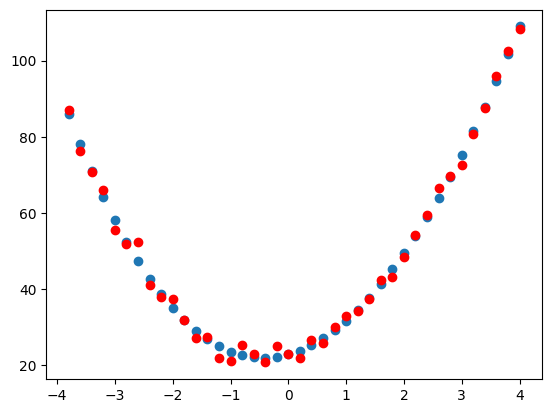

In [94]:
m = k = 4

X = np.vstack((np.ones(n), x, x**2, x**3, x**4)).T
theta_mnk = np.linalg.inv(X.T @ X) @ X.T @ Y

theta_mnk_4 = theta_mnk[k]
alpha_4 = np.linalg.inv(X.T @ X)[k][k]
E_norm = np.dot((Y - X @ theta_mnk).T, Y - X @ theta_mnk)**(0.5)
T_4 = (theta_mnk_4 * (n - m - 1)**(0.5)) / ((alpha_4)**(0.5) * E_norm)

df = n - m - 1
t_4 = st.t.ppf(q, df, loc=0, scale=1)

print("T_4 = ", T_4)
print("t_4 = ", t_4, "\n")
if(abs(T_4) > abs(t_4)):
    print("|T_4| > |t_4|, значит theta_4 не равна 0")
else: 
    print("|T_4| <= |t_4|, значит theta_4 равна 0")
    
plt.scatter(x, theta_mnk[0] + theta_mnk[1] * x + 
            theta_mnk[2] * x**2 + theta_mnk[3] * x**3 + theta_mnk[4] * x**4)
plt.scatter(x, Y, c='r')
plt.show()    

Таким образом, может получиться многочлен либо 2, либо 3 порядка в зависимости от сгенерированной ошибки

Далее будем предполагать, что получился многочлен 3 степени.

In [95]:
m = k = 3

X = np.vstack((np.ones(n), x, x**2, x**3)).T
theta_mnk = np.linalg.inv(X.T @ X) @ X.T @ Y
E = Y - X @ theta_mnk
E_norm = np.dot(E, E)**(0.5)
alpha_diag = np.diagonal(np.linalg.inv(X.T @ X))

print("theta_mnk =", theta_mnk)

theta_mnk = [22.65033478  4.18842598  4.9088778  -0.14584449]


Вектор остатков имеет вид:

E_theta = [ 1.25457884 -1.69275062 -0.07636668  1.63580016 -2.62132008 -0.77886924
  4.93919091 -1.76873704 -0.95744633  2.25849018 -0.08131506 -1.93445138
  0.45729581 -3.17716054 -2.44541888  2.83254754  1.02024246 -1.07097364
  3.12781486  0.211707   -1.85706811  1.37277227 -0.96399489  0.83091588
  1.34828474 -0.18028657 -0.33951091  1.0269364  -2.18562745 -1.17836839
  0.06485873  0.5832028   2.3247884   0.10930568 -2.81829483 -0.95630891
 -0.39955676  1.5105338   1.00576079 -0.43120095]


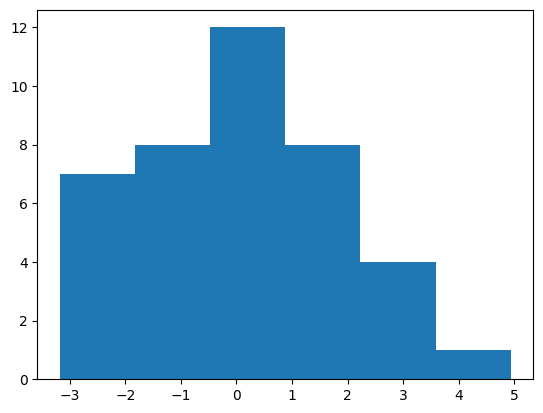

In [96]:
print("E_theta =", E)
plt.hist(E, 6)
plt.show()

Получили МНК оценку неизвестных коэффицентов $\theta$


## №2(а) 
**В предположении нормальности ошибок построить доверительные интервалы уровней надёжности $\alpha = 0.99$ для параметров $(\theta_0,....., \theta_m)$.**

Лемма: В нормальной регресии справедливо

$$ \frac{\hat{\theta_k} - \theta_k}{\sqrt{\alpha_k} ||\hat{E}|| } \sqrt{n - m - 1} \sim t(n - m - 1) $$

Отсюда доверительные интервалы можно построить следующим образом:

$$ -\frac{\sqrt{\alpha_k} ||\hat{E}|| }{\sqrt{n - m - 1}}t_{1-\frac{\alpha}{2}}(n - m - 1)  + \hat{\theta_k} \quad \geq \quad \theta_k \quad \geq \quad \frac{\sqrt{\alpha_k} ||\hat{E}|| }{\sqrt{n - m - 1}}t_{1-\frac{\alpha}{2}}(n - m - 1)  + \hat{\theta_k},$$ 

где $t_{\alpha}(n)$ - квантиль распределения Стьюдента уровня $\alpha$ с $n$ степенями свободы 

In [97]:
df = n - m - 1  
    
alpha = 0.01
q = 1 - alpha / 2
t_quantile = st.t.ppf(q, df)

theta_interval = np.zeros((4, 2))
for i in range(4):
    theta_interval[i][0] = theta_mnk[i] - (E_norm * alpha_diag[i]**(0.5) * t_quantile) / (
                           (n - m - 1)**(0.5))
    
    theta_interval[i][1] = theta_mnk[i] + (E_norm * alpha_diag[i]**(0.5) * t_quantile) / (
                           (n - m - 1)**(0.5))
    
    print("Доверительный интервал уровня 0,99 для θ_", i, " - ("
          , theta_interval[i][0], ", ", theta_interval[i][1], ")")

Доверительный интервал уровня 0,99 для θ_ 0  - ( 21.457550026612456 ,  23.84311953594131 )
Доверительный интервал уровня 0,99 для θ_ 1  - ( 3.328864395553688 ,  5.047987572329336 )
Доверительный интервал уровня 0,99 для θ_ 2  - ( 4.740445584714432 ,  5.077310005637167 )
Доверительный интервал уровня 0,99 для θ_ 3  - ( -0.22821611461738484 ,  -0.06347286029399353 )


## №3(а) 
**В предположении нормальности ошибок построить доверительные интервалы уровней надёжности $\alpha = 0.99$ для полезного сигнала.**

Лемма: В нормальной регрессии

$$ \frac{\varphi(t,\hat{\theta}) - \varphi(t,\theta)}{\sqrt{\alpha_k} ||\hat{E}|| } \sqrt{n - m - 1} \sim t(n - m - 1) $$

Замечание: $ \alpha(t) = (\varphi_1(t),...,\varphi_{m + 1}(t))(X^{T}X)^{-1}(\varphi_1(t),...,\varphi_{m + 1}(t))^{T} $

Отсюда же можно построить доверительные интервалы:

$$ -\frac{\sqrt{\alpha_k(x_k)} ||\hat{E}|| }{\sqrt{n - m - 1}}t_{1-\frac{\alpha}{2}}(n - m - 1)  + y(x_k,\hat{\theta}) \quad \geq \quad y(x_k,\theta) \quad \geq \quad \frac{\sqrt{\alpha_k(x_k)} ||\hat{E}|| }{\sqrt{n - m - 1}}t_{1-\frac{\alpha}{2}}(n - m - 1)  + y(x_k,\hat{\theta})$$ 

[ 85.62129012  77.99557787  70.88858548  64.29331242  58.20275815
  52.60992213  47.50780383  42.88940271  38.74771825  35.07574989
  31.86649712  29.11295938  26.80813616  24.9450269   23.51663108
  22.51594816  21.93597761  21.76971888  22.01017145  22.65033478
  23.68320833  25.10179157  26.89908397  29.06808498  31.60179407
  34.49321071  37.73533436  41.32116449  45.24370056  49.49594203
  54.07088837  58.96153905  64.16089352  69.66195126  75.45771173
  81.54117439  87.9053387   94.54320414 101.44777017 108.61203624]


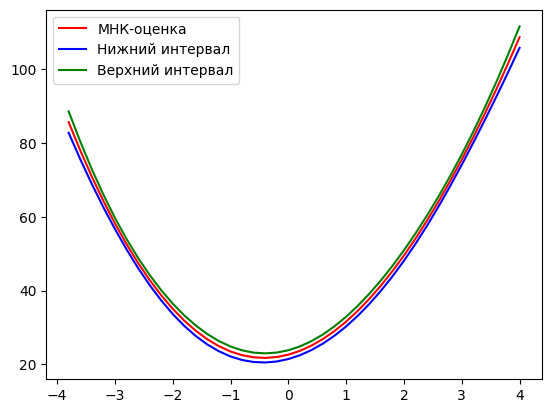

In [98]:
alpha_array = np.zeros(n)
for i in range(n):
    alpha_array[i] = X[i] @ np.linalg.inv(X.T @ X) @ X[i].T

df = n - m - 1

alpha = 0.01
q = 1 - alpha / 2
t_quantile = st.t.ppf(q, df)

Y_theta = theta_mnk[0] + theta_mnk[1] * x + theta_mnk[2] * x**2 + theta_mnk[3] * x**3

print(Y_theta)

Y_interval = np.zeros((2, n))
for i in range(n):
    Y_interval[0][i] = Y_theta[i] - (E_norm * alpha_array[i]**(0.5) * t_quantile) / (
                       (n - m - 1)**(0.5))
        
    Y_interval[1][i] = Y_theta[i] + (E_norm * alpha_array[i]**(0.5) * t_quantile) / (
                       (n - m - 1)**(0.5))

plt.plot(x, Y_theta, "r", label="МНК-оценка")
plt.plot(x, Y_interval[0], "b", label="Нижний интервал")
plt.plot(x, Y_interval[1], "g", label="Верхний интервал")    
plt.legend()
plt.show() 

## №4(а)
**Представить графически**
* истинный полезный сигнал,
* набор наблюдений,
* оценку полезного сигнала, полученную в шаге 1,
* доверительные интервалы полезного сигнала, полученные в шаге 3.

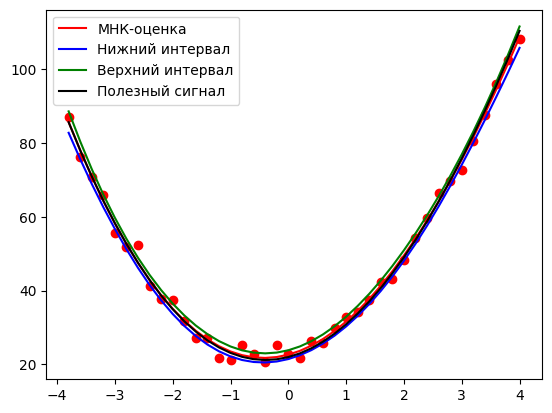

In [99]:
plt.plot(x, Y_theta, "r", label="МНК-оценка")
plt.plot(x, Y_interval[0], "b", label="Нижний интервал")
plt.plot(x, Y_interval[1], "g", label="Верхний интервал")    
plt.plot(x, Y_true, "black", label="Полезный сигнал")
plt.scatter(x, Y, c='r')

plt.legend()
plt.show() 

## №5(а)
**По остаткам регрессии построить оценку плотности распределения случайной ошибки наблюдения в виде гистограммы.**

Гистограмой называется функция вида


\begin{equation*}
\hat{f}_n(x) = 
 \begin{cases}
     \frac{n_k}{(t_{k+1}-t_{k})n} &\text{если $ x \in [t_k, \,t_{k+1})$}\\
     0  &\text{если $ x \in (t_0, \,t_1) \cup [t_l, \,t_{l+1})$}
 \end{cases}
\end{equation*}

,где $ -\infty = t_0 < t_1 < t_2 < ... < t_l < t_{l+1} = +\infty $ - разбиение $\Re$

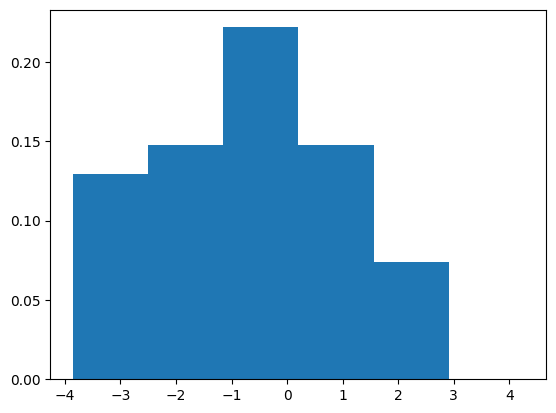

In [100]:
n_intervals = 1 + math.floor(3.32 * math.log10(n))
l = n_intervals + 1

x_hist = np.linspace(E.min(), E.max(), l)

p_hist = np.zeros(l + 1)
for i in range(1, l):
    n_i = 0
    for j in range(n):
        if(E[j] >= x_hist[i - 1] and E[j] < x_hist[i]):
            n_i += 1
    p_hist[i] = n_i / (n * (x_hist[1] - x_hist[0]))    

plt.bar(x_hist[0:l-1], p_hist[1:l], x_hist[1] - x_hist[0])
plt.show()

## №6(a)
**Вычислить оценку дисперсии $\sigma^2$ случайной ошибки.**

Для оценки дисперсии используем несмещенную оценку: 

$$ \tilde{\sigma^2} = \frac{1}{n - m - 1}||\hat{E}||^2 $$

In [101]:
sigma_squared_mnk = E_norm**(2) / (n - m - 1)

print("sigma_squared_mnk =", sigma_squared_mnk)

sigma_squared_mnk = 3.405771737279421


## №7(a)
**По остаткам регрессии с помощью $\chi^2$-критерия Пирсона на уровне значимости $0.05$ проверить гипотезу о том, что закон распределения ошибки наблюдения является нормальным.**

Критерий Пирсона: $\quad H_0: \, E \sim N(0, \theta), \,\, H_1: \, E \nsim N(0, \theta) $

Первый параметр распределения можно определить из гистограммы в номере 5, второй параметр найдем из МП оценки:

Лемма: МП-оценка $\sigma^2$ имеет следующий вид: 

$$ \hat{\sigma^2} = \frac{1}{n}||\hat{E}||^2 $$

Значит, имеем:

$$ \theta = \frac{1}{n}||\hat{E}||^2 $$



Далее

$$ T(Z_n) = \sum_{k=0}^{l} \frac{n(\hat{p_k}-p_k)^2}{p_k}, \,\, \hat{p_0}=\hat{p_l}=0 , $$
где $ p_k=\Phi_0(\frac{x_{k+1}}{\sqrt{\theta}}) - \Phi_0(\frac{x_{k}}{\sqrt{\theta}}) , \,\, \hat{p_k}=\frac{n_k}{n}, \,\, l$ - количество точек разбиения прямой

Далее, 

$$ Law(T(Z_n) | H_0) \sim \chi^2(l - 1), \quad G_{0\alpha} = (0, \,\,\,\chi^2_{1-\alpha}(l - 1) ),  \quad G_{1\alpha} = \Re^{+} \backslash G_{0\alpha} $$

Остается просто проверить приналдлежность интервалам $G_{0\alpha}$ или $G_{1\alpha}$:

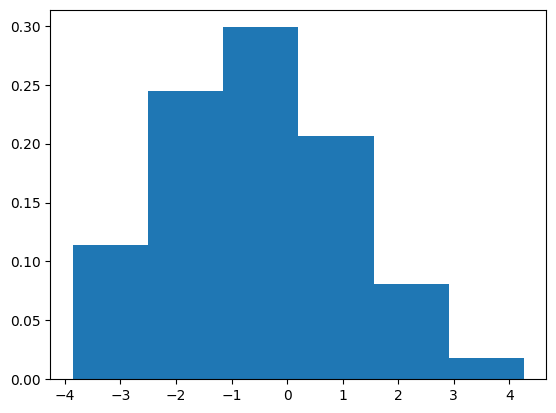

In [102]:
p = np.zeros(l + 1)

sigma_squared_mp = E_norm**(2) / n

p[0] = st.norm.cdf(x_hist[0], 0, sigma_squared_mp**(0.5))
p[l] = 1 - st.norm.cdf(x_hist[l - 1], 0, sigma_squared_mp**(0.5))

for i in range(1, l):
    p[i] = st.norm.cdf(x_hist[i], 0, sigma_squared_mp**(0.5)) - (
           st.norm.cdf(x_hist[i - 1], 0, sigma_squared_mp**(0.5)))

plt.bar(x_hist[0:l-1], p[1:l], x_hist[1] - x_hist[0])
plt.show()

In [103]:
T = 0
for i in range(0, l + 1):
    T += (n * (p_hist[i] * (x_hist[1] - x_hist[0]) - p[i])**2) / p[i]
  
df = l - 1
alpha = 0.05
q = 1 - alpha
t = st.chi2.ppf(q, df)

print("T = ", T)
print("t = ", t, "\n")
if(T > t): 
    print("T > t, значит ошибка имеет не нормальное распределение!")
else: 
    print("T <= t, значит ошибка имеет нормальное распределение!")

T =  4.03618316163592
t =  12.591587243743977 

T <= t, значит ошибка имеет нормальное распределение!


## Далее выполним те же действия для другого набора наблюдений

### Моделирование данных

[ 80.2407165   75.31184442  65.0499612   58.2681858   51.94217667
  45.00343306  40.71607714  41.58787241  41.49899245  35.88180561
  32.64324094  25.95999152  21.3703754   25.89487236  27.4190417
  26.73932966  18.67358701  16.68727274  24.16289723  19.43673638
  27.12444433  23.60115515  30.22098234  25.18848894  35.20061431
  31.03769181  38.28732754  42.92845048  42.86122979  53.63971137
  51.18068992  63.29012006  63.15549864  72.20066355  80.35553183
  87.71296915  97.38651643  97.07713158 109.99309481 119.84404086]


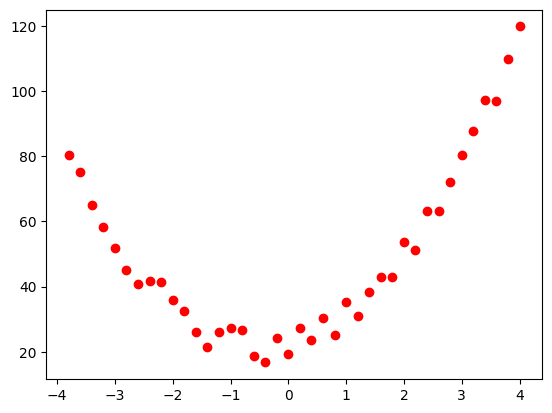

In [104]:
#error_uniformal = st.uniform.rvs(loc=-3*sigma_squared**(0.5), scale=6*sigma_squared**(0.5), size=n)

error_uniformal = np.zeros(n)
error_uniformal = np.array([1.2407165029891551
,2.911844423725139
,-1.1500388039463045
,-2.131814200827929
,-3.0578233283810152
,-4.996566937674083
,-4.683922856305481
,0.38787240689396985
,4.098992452826513
,1.881805614117269
,1.6432409387767049
,-2.4400084832487754
,-4.829624597758185
,1.494872363197067
,4.419041698342612
,4.739329664843577
,-2.72641299291693
,-4.51272725745865
,2.7628972313830014
,-2.56326362425876
,4.124444328425289
,-0.7988448484927977
,4.020982337307396
,-3.2115110579573773
,4.200614306604475
,-2.9623081918796403
,0.8873275449787812
,1.7284504815080064
,-2.538770207253118
,3.6397113749138956
,-3.819310076834193
,2.8901200574504875
,-3.044501360704601
,-0.19933644578695375
,1.3555318254506457
,1.7129691510763196
,3.98651643003992
,-4.122868421071507
,0.593094814365049
,1.8440408606707877])

x = np.linspace(-4 + 0.2, 4, n)

Y_true = theta_0 + theta_1*x + theta_2*x**2

Y = Y_true + error_uniformal
print(Y)

fig, ax1 = plt.subplots(1, 1)
plt.scatter(x, Y, c='r')

plt.show()

Ошибка, имеющая распределение равномерной случайной величины, сгенерированная питоном выглядит следующим образом:

[ 1.2407165   2.91184442 -1.1500388  -2.1318142  -3.05782333 -4.99656694
 -4.68392286  0.38787241  4.09899245  1.88180561  1.64324094 -2.44000848
 -4.8296246   1.49487236  4.4190417   4.73932966 -2.72641299 -4.51272726
  2.76289723 -2.56326362  4.12444433 -0.79884485  4.02098234 -3.21151106
  4.20061431 -2.96230819  0.88732754  1.72845048 -2.53877021  3.63971137
 -3.81931008  2.89012006 -3.04450136 -0.19933645  1.35553183  1.71296915
  3.98651643 -4.12286842  0.59309481  1.84404086]


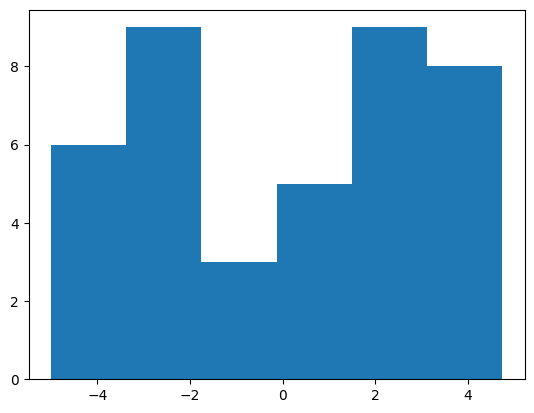

In [105]:
print(error_uniformal)

with open('file2.txt', 'w') as f:
    for i in range(40):
        print(error_uniformal[i], file=f)

plt.hist(error_uniformal, 6)
plt.show()

## №1(б)


T_1 =  3.071765433744839
t_1 =  2.024394164575136 

|T_1| > |t_1|, значит theta_1 не равна 0


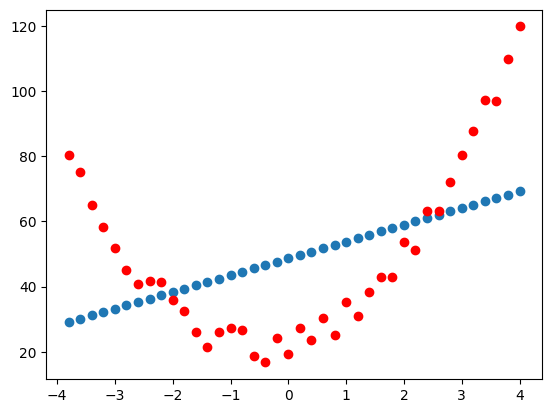

In [106]:
m = k = 1

X = np.vstack((np.ones(n), x)).T
theta_mnk = np.linalg.inv(X.T @ X) @ X.T @ Y

theta_mnk_1 = theta_mnk[k]
alpha_1 = np.linalg.inv(X.T @ X)[k][k]
E_norm = np.dot((Y - X @ theta_mnk).T, Y - X @ theta_mnk)**(0.5)
T_1 = (theta_mnk_1 * (n - m - 1)**(0.5)) / ((alpha_1)**(0.5) * E_norm)

alpha = 0.05
q = 1 - alpha / 2
df = n - m - 1
t_1 = st.t.ppf(q, df, loc=0, scale=1)

print("T_1 = ", T_1)
print("t_1 = ", t_1, "\n")
if(abs(T_1) > abs(t_1)): 
    print("|T_1| > |t_1|, значит theta_1 не равна 0")
else: 
    print("|T_1| <= |t_1|, значит theta_1 равна 0")
    
plt.scatter(x, theta_mnk[0] + theta_mnk[1] * x)
plt.scatter(x, Y, c='r')
plt.show()

T_2 =  47.21640756424398
t_2 =  2.0261924630291093 

|T_2| > |t_2|, значит theta_2 не равна 0


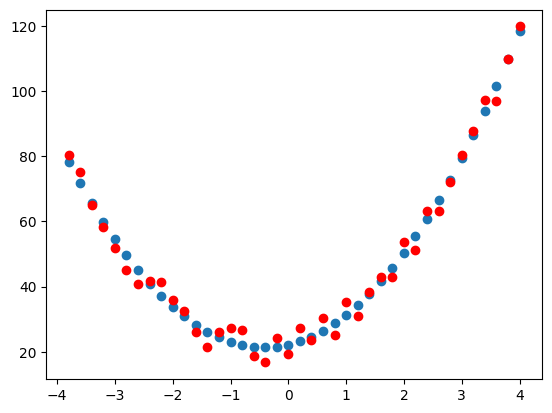

In [107]:
m = k = 2

X = np.vstack((np.ones(n), x, x**2)).T
theta_mnk = np.linalg.inv(X.T @ X) @ X.T @ Y

theta_mnk_2 = theta_mnk[k]
alpha_2 = np.linalg.inv(X.T @ X)[k][k]
E_norm = np.dot((Y - X @ theta_mnk).T, Y - X @ theta_mnk)**(0.5)
T_2 = (theta_mnk_2 * (n - m - 1)**(0.5)) / ((alpha_2)**(0.5) * E_norm)

df = n - m - 1
t_2 = st.t.ppf(q, df, loc=0, scale=1)

print("T_2 = ", T_2)
print("t_2 = ", t_2, "\n")
if(abs(T_2) > abs(t_2)):
    print("|T_2| > |t_2|, значит theta_2 не равна 0")
else: 
    print("|T_2| <= |t_2|, значит theta_2 равна 0")
    
plt.scatter(x, theta_mnk[0] + theta_mnk[1] * x + theta_mnk[2] * x**2)
plt.scatter(x, Y, c='r')
plt.show()

T_3 =  -0.09261223343167624
t_3 =  2.0280940009804502 

|T_3| <= |t_3|, значит theta_3 равна 0


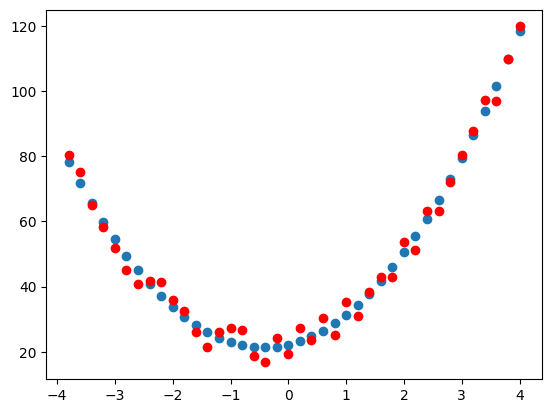

In [108]:
m = k = 3

X = np.vstack((np.ones(n), x, x**2, x**3)).T
theta_mnk = np.linalg.inv(X.T @ X) @ X.T @ Y

theta_mnk_3 = theta_mnk[k]
alpha_3 = np.linalg.inv(X.T @ X)[k][k]
E_norm = np.dot((Y - X @ theta_mnk).T, Y - X @ theta_mnk)**(0.5)
T_3 = (theta_mnk_3 * (n - m - 1)**(0.5)) / ((alpha_3)**(0.5) * E_norm)

df = n - m - 1
t_3 = st.t.ppf(q, df, loc=0, scale=1)

print("T_3 = ", T_3)
print("t_3 = ", t_3, "\n")
if(abs(T_3) > abs(t_3)):
    print("|T_3| > |t_3|, значит theta_3 не равна 0")
else: 
    print("|T_3| <= |t_3|, значит theta_3 равна 0")
    
plt.scatter(x, theta_mnk[0] + theta_mnk[1] * x + theta_mnk[2] * x**2 
            + theta_mnk[3] * x**3)
plt.scatter(x, Y, c='r')
plt.show()    

Здесь также может получиться полином второй или третьей степени. Будем считать, что получилась вторая:

In [109]:
m = k = 2

X = np.vstack((np.ones(n), x, x**2)).T
theta_mnk = np.linalg.inv(X.T @ X) @ X.T @ Y
E = Y - X @ theta_mnk
E_norm = np.dot(E.T, E)**(0.5)
alpha_diag = np.diagonal(np.linalg.inv(X.T @ X))

print("theta_mnk =", theta_mnk)

theta_mnk = [22.1928271   4.1606681   4.97387175]


Вектор остатков имеет вид

E_theta = [ 2.03572006  3.63604455 -0.49455184 -1.54295014 -2.53349192 -4.53467791
 -4.28238596  0.73114744  4.38609588  2.11482769  1.82427193 -2.30887832
 -4.746305    1.53247165  4.41301094  4.69175912 -2.81343307 -4.6371066
  2.60324888 -2.75609073  3.90052873 -1.05175867  3.74116054 -3.51615056
  3.87324735 -3.31031234  0.52077646  1.34544273 -2.93614437  3.23006106
 -4.23914629  2.46218822 -3.47843858 -0.63718877  0.91585464  1.27355737
  3.54946032 -4.55547861  0.16702081  1.42659331]


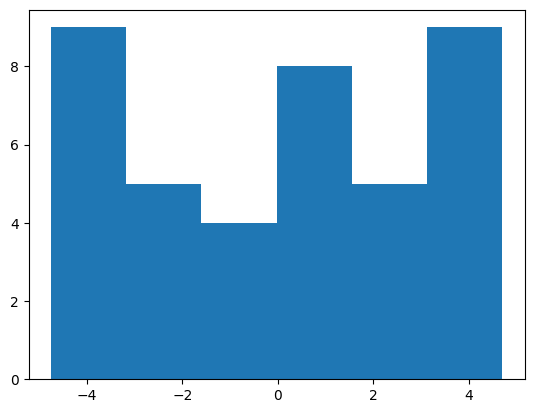

In [110]:
print("E_theta =", E)
plt.hist(E, 6)
plt.show()

## №2(б) 

In [111]:
df = n - m - 1  
    
alpha = 0.01
q = 1 - alpha / 2
t_quantile = st.t.ppf(q, df)

theta_interval = np.zeros((3, 2))
for i in range(3):
    theta_interval[i][0] = theta_mnk[i] - (E_norm * alpha_diag[i]**(0.5) * t_quantile) / (
                           (n - m - 1)**(0.5))
        
    theta_interval[i][1] = theta_mnk[i] + (E_norm * alpha_diag[i]**(0.5) * t_quantile) / (
                           (n - m - 1)**(0.5))
        
    print("Доверительный интервал уровня 0,99 для θ_", i, " - (", 
           theta_interval[i][0], ", ", theta_interval[i][1], ")")

Доверительный интервал уровня 0,99 для θ_ 0  - ( 20.149455979954872 ,  24.236198229827913 )
Доверительный интервал уровня 0,99 для θ_ 1  - ( 3.567785113463687 ,  4.75355108447622 )
Доверительный интервал уровня 0,99 для θ_ 2  - ( 4.687825113345666 ,  5.259918393448282 )


## №3(б) 

[ 78.20499645  71.67579987  65.54451304  59.81113594  54.47566859
  49.53811097  44.9984631   40.85672497  37.11289657  33.76697792
  30.81896901  28.26886984  26.1166804   24.36240071  23.00603076
  22.04757055  21.48702008  21.32437935  21.55964836  22.1928271
  23.22391559  24.65291383  26.4798218   28.70463951  31.32736696
  34.34800415  37.76655108  41.58300775  45.79737416  50.40965032
  55.41983621  60.82793184  66.63393722  72.83785233  79.43967718
  86.43941178  93.83705611 101.63261019 109.826074   118.41744756]


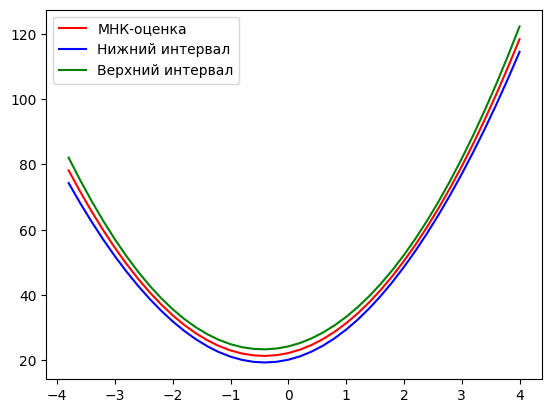

In [112]:
alpha_array = np.zeros(n)
for i in range(n):
    alpha_array[i] = X[i] @ np.linalg.inv(X.T @ X) @ X[i].T

df = n - m - 1

alpha = 0.01
q = 1 - alpha / 2
t_quantile = st.t.ppf(q, df)

Y_theta = theta_mnk[0] + theta_mnk[1] * x + theta_mnk[2] * x**2

print(Y_theta)

Y_interval = np.zeros((2, n))
for i in range(n):
    Y_interval[0][i] = Y_theta[i] - (E_norm * alpha_array[i]**(0.5) * t_quantile) / (
                       (n - m - 1)**(0.5))
        
    Y_interval[1][i] = Y_theta[i] + (E_norm * alpha_array[i]**(0.5) * t_quantile) / (
                       (n - m - 1)**(0.5))

plt.plot(x, Y_theta, "r", label="МНК-оценка")
plt.plot(x, Y_interval[0], "b", label="Нижний интервал")
plt.plot(x, Y_interval[1], "g", label="Верхний интервал")    
plt.legend()
plt.show() 

## №4(б) 

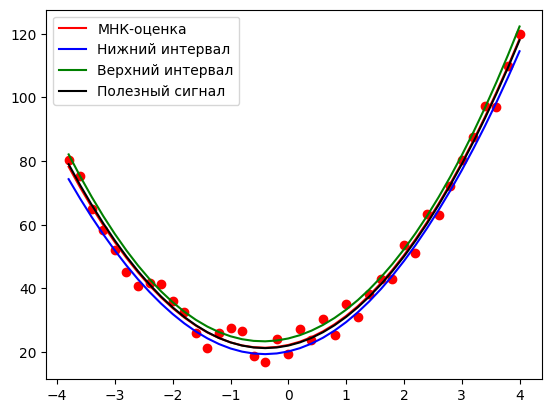

In [113]:
plt.plot(x, Y_theta, "r", label="МНК-оценка")
plt.plot(x, Y_interval[0], "b", label="Нижний интервал")
plt.plot(x, Y_interval[1], "g", label="Верхний интервал")    
plt.plot(x, Y_true, "black", label="Полезный сигнал")
plt.scatter(x, Y, c='r')

plt.legend()
plt.show() 

## №5(б) 

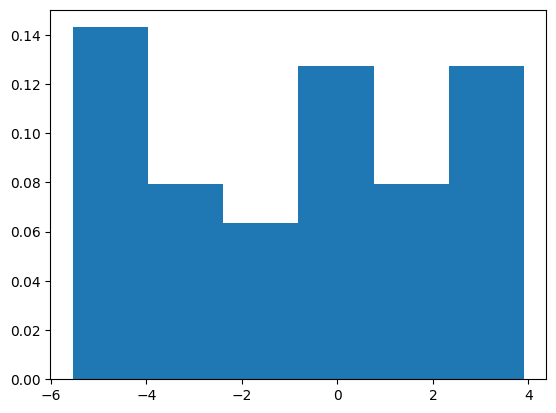

In [114]:
n_intervals = 1 + math.floor(3.32 * math.log10(n))
l = n_intervals + 1

x_hist = np.linspace(E.min(), E.max(), l)

p_hist = np.zeros(l + 1)
for i in range(1, l):
    n_i = 0
    for j in range(n):
        if(E[j] >= x_hist[i - 1] and E[j] < x_hist[i]):
            n_i += 1
    p_hist[i] = n_i / (n * (x_hist[1] - x_hist[0]))    

plt.bar(x_hist[0:l-1], p_hist[1:l], x_hist[1] - x_hist[0])
plt.show()

## №6(б) 

In [115]:
sigma_squared_mnk = E_norm**(2) / (n - m - 1)

print("sigma_squared_mnk =", sigma_squared_mnk)

sigma_squared_mnk = 10.069133622163353


## №7(б) 

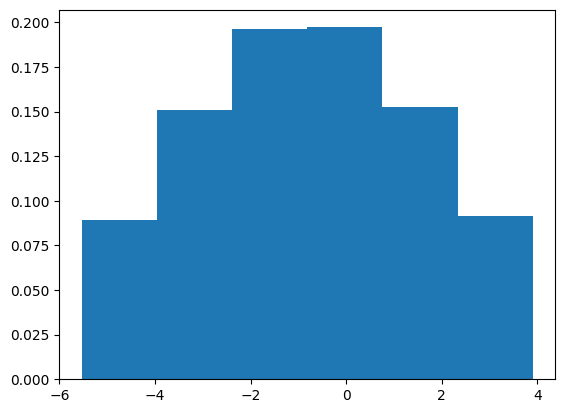

In [116]:
p = np.zeros(l + 1)

sigma_squared_mp = E_norm**(2) / n 

p[0] = st.norm.cdf(x_hist[0], 0, sigma_squared_mp**(0.5))
p[l] = 1 - st.norm.cdf(x_hist[l - 1], 0, sigma_squared_mp**(0.5))

for i in range(1, l):
    p[i] = st.norm.cdf(x_hist[i], 0, sigma_squared_mp**(0.5)) - (
           st.norm.cdf(x_hist[i - 1], 0, sigma_squared_mp**(0.5)))

plt.bar(x_hist[0:l-1], p[1:l], x_hist[1] - x_hist[0])
plt.show()

In [117]:
T = 0
for i in range(0, l + 1):
    T += (n * (p_hist[i] * (x_hist[1] - x_hist[0]) - p[i])**2) / p[i]
  
df = l - 1
alpha = 0.05
q = 1 - alpha
t = st.chi2.ppf(q, df)

print("T = ", T)
print("t = ", t, "\n")
if(T > t): 
    print("T > t, значит ошибка имеет не нормальное распределение!")
else: 
    print("T <= t, значит ошибка имеет нормальное распределение!")

T =  20.586480134725928
t =  12.591587243743977 

T > t, значит ошибка имеет не нормальное распределение!


## Вывод

В ходе выполнения курсовой работы были сначала смоделированы, а потом изучены и оценены данные с помощью метода наименьших квадратов. Было выяснено, что даже на небольшом количестве данных могут работать доверительные интервалы. Кроме того оказалось, что методы изучения линейных регрессионных моделей могут быть применены не только к моделям наблюдений с нормальными ошибками, но и с ошибками распределенными равномерно. Еще хочется отметить, что при увеличение наблюдений в выборке методы предложенные в курсовой начинают работать стабильнее